In [1]:
# from random import *
# import time
# import math
# import sys
# import matplotlib.pyplot as plt
# import graphviz

#!{sys.executable} -m pip install graphviz

from helpers import *

In [2]:
# B = z + B x B

def random_binary_tree_free(x,maxi):
    size = 0
    def genB():
        nonlocal size # compteur global   
        if random() < 2*x/(1-math.sqrt(1-4*x)):
            size += 1
            if size > maxi:
                raise Exception("Too large")
            return ['z']
        else:
            return [genB(), genB()]
    try:
        return genB(), size
    except Exception as err:
        #print(err)
        return None, 0

In [3]:
t,s = random_binary_tree_free(.24999,100)
print(t,s)

['z'] 1


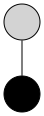

In [4]:
draw_tree_unlabelled2(t,5,5)

In [5]:
def random_binary_tree(x, n):
    return gen_random_fixed_size(random_binary_tree_free, x, n)

def random_binary_tree_approx(x, mini, maxi):
    return gen_random_approx_size(random_binary_tree_free, x, mini, maxi)
        

In [6]:
size = 10
nb_trials,size_trials,t = random_binary_tree(.24, size)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(t)

nombre d'essais = 9, taille du rejet = 25, taille de l'arbre = 10

[[[['z'], [['z'], ['z']]], [['z'], ['z']]], [[[[['z'], ['z']], ['z']], ['z']], ['z']]]


In [7]:
nb_trials,size_trials,t,size = random_binary_tree_approx(.249, 90, 110)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(t)


nombre d'essais = 65, taille du rejet = 364, taille de l'arbre = 94

[['z'], [[['z'], [[[['z'], [['z'], [['z'], ['z']]]], [['z'], [[[[[[[[[['z'], [['z'], ['z']]], [[[['z'], ['z']], ['z']], ['z']]], [['z'], [['z'], [[['z'], [['z'], ['z']]], [[['z'], [['z'], [['z'], ['z']]]], ['z']]]]]], [['z'], ['z']]], [[['z'], ['z']], ['z']]], ['z']], ['z']], [[['z'], [[['z'], [[[[[[[['z'], ['z']], [[[[['z'], ['z']], ['z']], [[[[[['z'], [['z'], [['z'], [['z'], [[['z'], ['z']], ['z']]]]]], [[[['z'], [['z'], [[['z'], ['z']], [[[['z'], [['z'], [['z'], [[['z'], [['z'], ['z']]], ['z']]]]], [[['z'], [['z'], ['z']]], [['z'], [['z'], [['z'], ['z']]]]]], [['z'], ['z']]]]]], [['z'], ['z']]], ['z']]], ['z']], ['z']], [['z'], ['z']]]], [['z'], [['z'], ['z']]]]], [[['z'], [['z'], ['z']]], ['z']]], ['z']], ['z']], ['z']], ['z']]], [['z'], [['z'], ['z']]]]], ['z']]], [[['z'], ['z']], [['z'], [['z'], ['z']]]]]]], ['z']]], ['z']]]


In [8]:
count_occurences(lambda : random_binary_tree(.24, 4)[2],100000)

nb: 5
[['z'], [[['z'], ['z']], ['z']]] 20.00
[[[['z'], ['z']], ['z']], ['z']] 20.01
[['z'], [['z'], [['z'], ['z']]]] 20.13
[[['z'], ['z']], [['z'], ['z']]] 20.02
[[['z'], [['z'], ['z']]], ['z']] 19.84


In [9]:
nb_trials,size_trials,t,size = random_binary_tree_approx(.249, 900, 1_100)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

..................
nombre d'essais = 1880, taille du rejet = 15377, taille de l'arbre = 1010



In [10]:
# B = z + B x B
# Bdot = zdot + Bdot x B + b x Bdot

def random_binary_tree_free2(x,maxi):
    size = 0
    def genB():
        nonlocal size # compteur global   
        if random() < 2*x/(1-math.sqrt(1-4*x)):
            size += 1
            if size > maxi:
                raise Exception("Too large")
            return ['z']
        else:
            return [genB(), genB()]
    def genBdot():
        nonlocal size # compteur global   
        u = random()
        if random() < math.sqrt(1-4*x):
            size += 1
            if size > maxi:
                raise Exception("Too large")
            return ['z']
        elif random() < 1/2 :#u < 1/2-math.sqrt(1-4*x)/2:
            return [genBdot(), genB()]
        else:
            return [genB(), genBdot()]
    try:
        return genBdot(), size
    except Exception as err:
        #print(err)
        return None, 0

In [11]:
def random_binary_tree2(x, n):
    return gen_random_fixed_size(random_binary_tree_free2, x, n)

def random_binary_tree_approx2(x, mini, maxi):
    return gen_random_approx_size(random_binary_tree_free2, x, mini, maxi)

In [12]:
count_occurences(lambda : random_binary_tree2(.24, 4)[2],100000)

nb: 5
[[[['z'], ['z']], ['z']], ['z']] 20.08
[['z'], [[['z'], ['z']], ['z']]] 20.00
[['z'], [['z'], [['z'], ['z']]]] 19.96
[[['z'], [['z'], ['z']]], ['z']] 19.96
[[['z'], ['z']], [['z'], ['z']]] 20.00


In [25]:
nb_trials,size_trials,t,size = random_binary_tree_approx2(.2497497497, 490, 510) # x tel que xBdot'(x)/Bdot(x) = 500
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

# for _ in range(20):
#     nb_trials,size_trials,t,size = random_binary_tree_approx2(.2497497497, 490, 510)
#     print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

.
nombre d'essais = 137, taille du rejet = 12974, taille de l'arbre = 506



In [27]:
nb_trials,size_trials,t,size = random_binary_tree_approx(.2499997495, 490, 510) # x tel que xB'(x)/B(x) = 500
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

# for _ in range(20):
#     nb_trials,size_trials,t,size = random_binary_tree_approx(.249997495, 490, 510)
#     print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

..
nombre d'essais = 285, taille du rejet = 4644, taille de l'arbre = 490



In [15]:
n = 100_000
l = counts_max_and_average(lambda : random_binary_tree_free(.2499999, 1000)[1], n)

trop grands = 1639, taille max = 999, moyenne des tailles = 17.62991


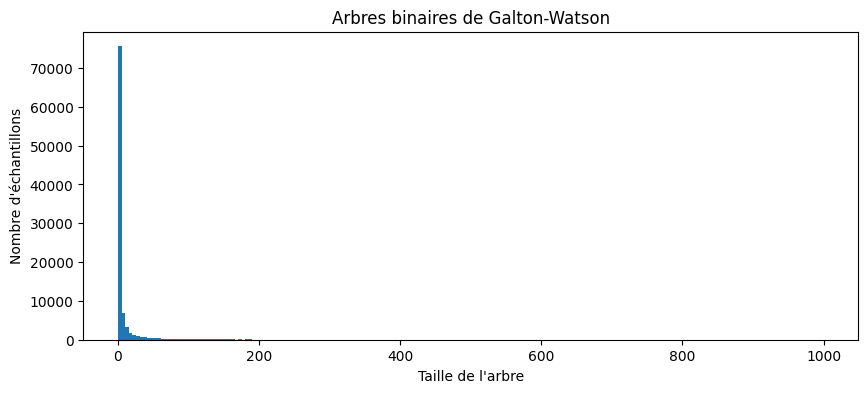

<Figure size 2000x400 with 0 Axes>

In [16]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=200)
plt.title("Arbres binaires")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
f = plt.figure()
f.set_figwidth(20)
plt.show()

In [17]:
n = 100_000
l = counts_max_and_average(lambda : random_binary_tree_free2(.2499999, 1000)[1], n)

trop grands = 97762, taille max = 999, moyenne des tailles = 7.29787


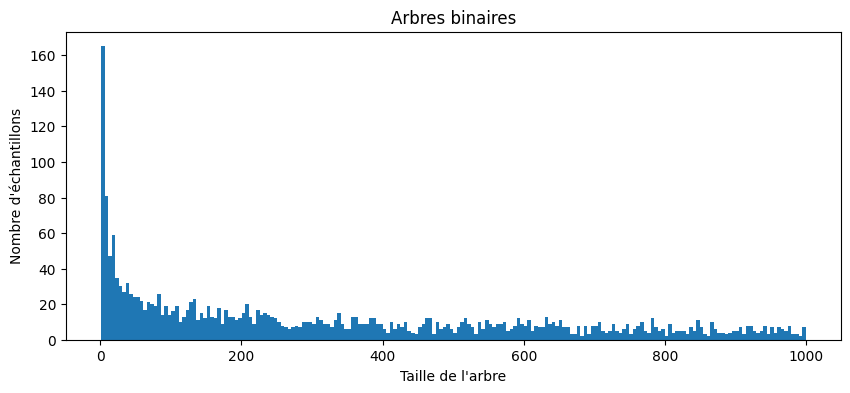

<Figure size 2000x400 with 0 Axes>

In [18]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=200)
plt.title("Arbres binaires")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
f = plt.figure()
f.set_figwidth(20)
plt.show()